In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
dt = pd.read_csv("C:/Users/Shreesai/Desktop/DATA SCIENCE/Cardiotocographic.csv")

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


<Axes: >

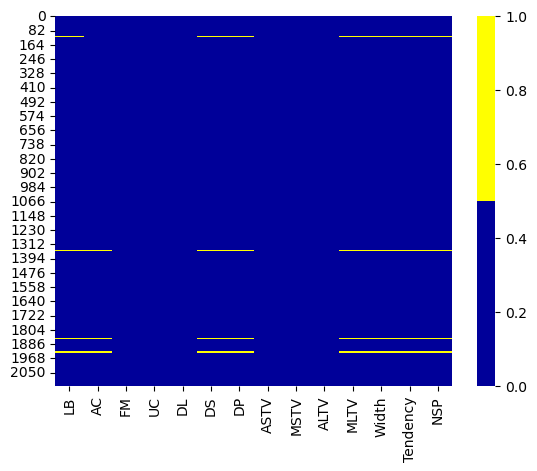

In [4]:
cols = dt.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dt[cols].isnull(),
            cmap=sns.color_palette(colours))

In [5]:
dt= dt[dt['NSP']<=3]

In [6]:
dt= dt[dt['NSP']>0]

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2088 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2088 non-null   float64
 1   AC        2088 non-null   float64
 2   FM        2088 non-null   float64
 3   UC        2088 non-null   float64
 4   DL        2088 non-null   float64
 5   DS        2088 non-null   float64
 6   DP        2088 non-null   float64
 7   ASTV      2088 non-null   float64
 8   MSTV      2088 non-null   float64
 9   ALTV      2088 non-null   float64
 10  MLTV      2088 non-null   float64
 11  Width     2088 non-null   float64
 12  Tendency  2088 non-null   float64
 13  NSP       2088 non-null   float64
dtypes: float64(14)
memory usage: 244.7 KB


In [8]:
dt= dt.dropna()

In [9]:
dt

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [10]:
 dt.describe()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,133.361809,0.003203,0.009997,0.004385,0.001886,0.000002,0.000174,46.959612,1.359634,10.291871,8.334554,70.359548,0.316562,1.298325
std,11.292451,0.004328,0.068132,0.003347,0.003315,0.000140,0.000840,18.867104,1.171439,21.202908,7.676789,42.593653,0.645464,0.606263
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,0.967075
25%,126.000000,0.000000,0.000000,0.001834,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004481,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.199120,0.005638,0.002565,0.006540,0.003275,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,3.000000


In [11]:
dt =dt[dt['LB']>80]

In [12]:
dt = dt[dt['LB']< 180]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


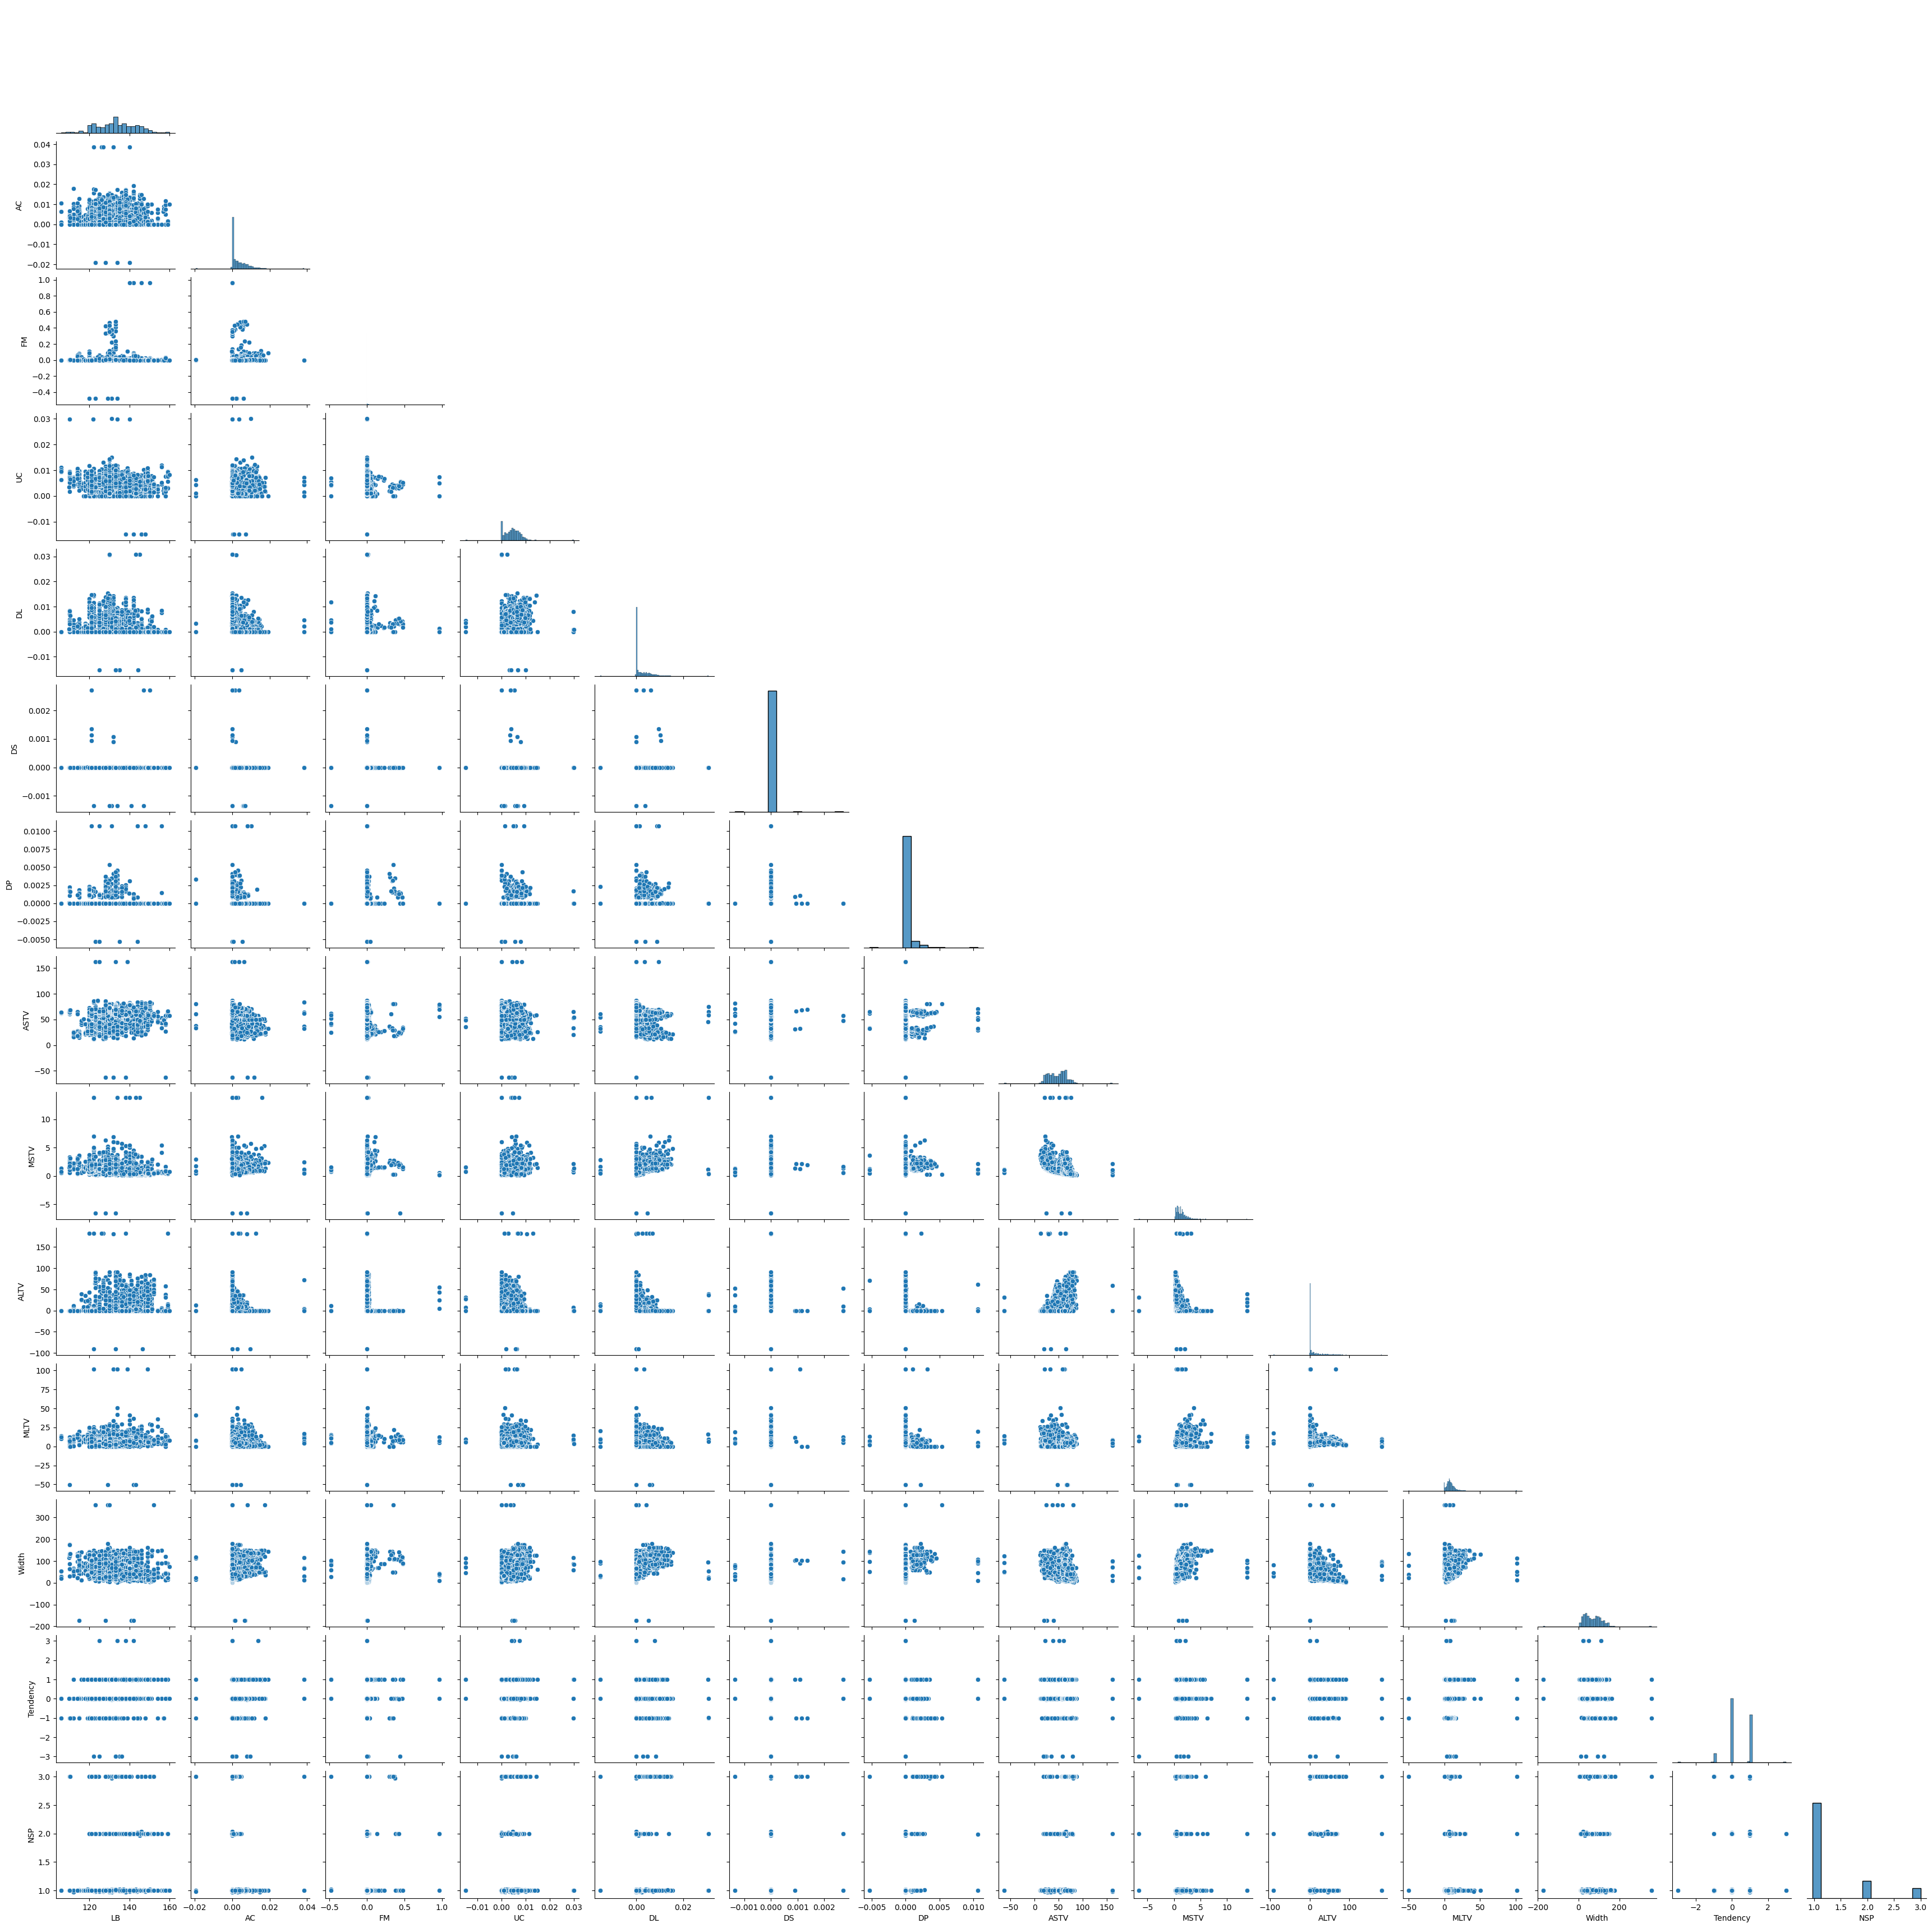

In [13]:
sns.pairplot(dt, corner=True)
plt.show()

In [14]:
condition = (dt['AC'] >= -0.01) & (dt['AC'] <= 0.03)
dt = dt[condition]

In [15]:
condition = (dt['LB'] >= 60) & (dt['LB'] <= 160)
dt = dt[condition]

In [16]:
condition = (dt['Tendency'] >= -1) & (dt['Tendency'] <=1)
dt = dt[condition]
def is_whole_number(value):
    return value == int(value)
dt = dt[dt['Tendency'].apply(is_whole_number)]

In [17]:
def is_whole_number(value):
    return value == int(value)
dt = dt[dt['NSP'].apply(is_whole_number)]

In [18]:
condition = (dt['FM'] >= -0.04) & (dt['FM'] <= 0.6)
dt = dt[condition]

In [19]:
condition = (dt['MSTV'] >= -5) & (dt['MSTV'] <=10)
dt = dt[condition]

In [20]:
condition = (dt['MSTV'] >= -5) & (dt['MSTV'] <=10)
dt = dt[condition]

In [21]:
condition = (dt['ALTV'] >= -90) & (dt['ALTV'] <=100)
dt = dt[condition]

In [22]:
condition = (dt['MLTV'] >= -40) & (dt['MLTV'] <=100)
dt = dt[condition]

In [23]:
condition = (dt['Width'] >= -100) & (dt['Width'] <=200)
dt = dt[condition]

In [24]:
dt

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.000000,10.4,130.0,0.0,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.000000,13.4,130.0,0.0,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.000000,23.0,117.0,1.0,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.000000,19.9,117.0,1.0,1.0
5,134.000000,0.001116,0.000000,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.000000,0.0,150.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,140.000000,0.000000,0.000000,0.006764,0.001127,0.0,0.000000,79.0,0.6,27.000000,6.4,26.0,1.0,1.0
2120,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.000000,77.0,0.7,17.000000,6.0,31.0,0.0,1.0
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.000000,78.0,0.4,22.000000,7.1,66.0,1.0,2.0
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.000000,78.0,0.4,27.000000,7.0,66.0,1.0,2.0


In [25]:
dt.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,1820.00000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,133.38357,0.003157,0.009610,0.004363,0.001887,0.000002,0.000171,46.990278,1.333471,9.954431,8.242144,70.513718,0.320879,1.306593
std,9.88037,0.003831,0.046680,0.003310,0.003197,0.000144,0.000819,18.709280,0.877963,18.574549,5.696127,39.010010,0.606274,0.615415
min,106.00000,-0.000185,-0.005106,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,0.200000,-0.899870,-0.200788,3.000000,-1.000000,1.000000
25%,126.00000,0.000000,0.000000,0.001782,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.00000,0.001643,0.000000,0.004473,0.000000,0.000000,0.000000,48.500000,1.200000,0.000000,7.400000,68.000000,0.000000,1.000000
75%,141.00000,0.005612,0.002667,0.006579,0.003318,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,160.00000,0.019284,0.480634,0.030002,0.030769,0.002706,0.010695,162.000000,7.000000,91.000000,50.700000,180.000000,1.000000,3.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


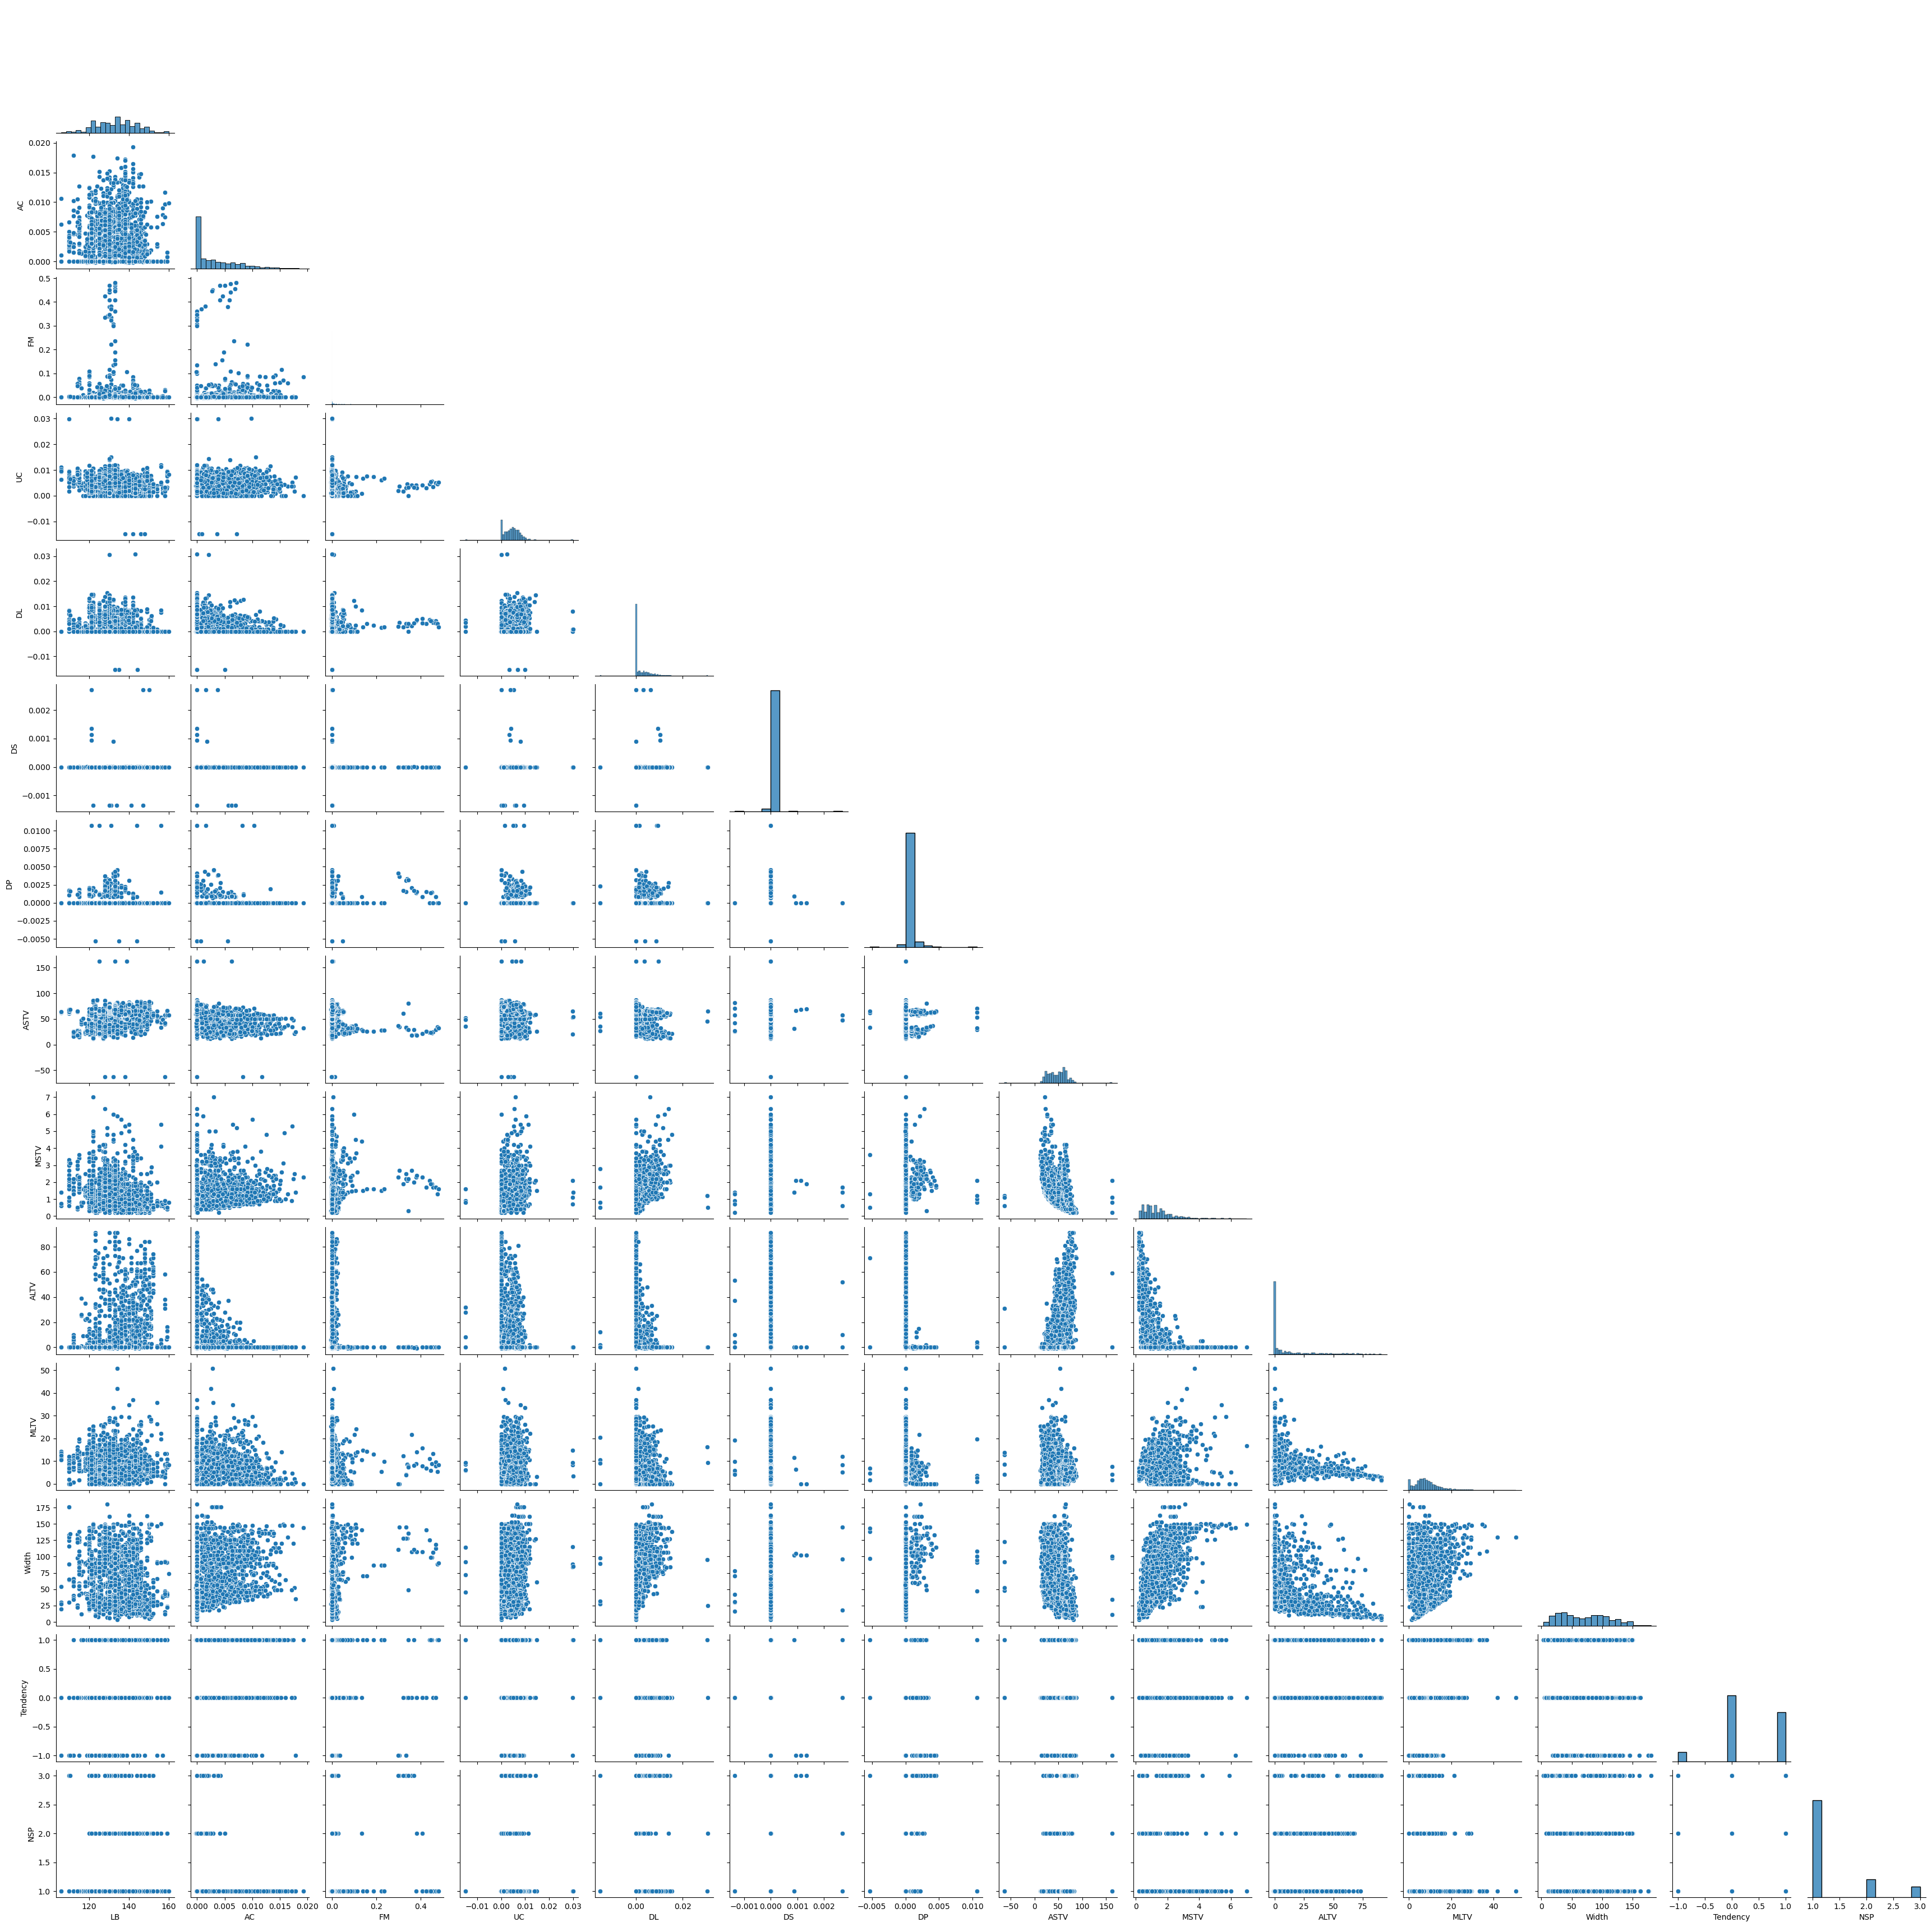

In [26]:
sns.pairplot(dt, corner=True)
plt.show()

In [27]:
np.std(dt)

LB           9.877655
AC           0.003830
FM           0.046667
UC           0.003309
DL           0.003196
DS           0.000144
DP           0.000818
ASTV        18.704139
MSTV         0.877721
ALTV        18.569446
MLTV         5.694562
Width       38.999291
Tendency     0.606107
NSP          0.615246
dtype: float64

In [28]:
np.var(dt)

LB          9.756807e+01
AC          1.466844e-05
FM          2.177854e-03
UC          1.094977e-05
DL          1.021677e-05
DS          2.075191e-08
DP          6.697087e-07
ASTV        3.498448e+02
MSTV        7.703950e-01
ALTV        3.448243e+02
MLTV        3.242803e+01
Width       1.520945e+03
Tendency    3.673663e-01
NSP         3.785280e-01
dtype: float64

In [29]:
dt.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.079380,-0.034190,-0.170738,-0.147252,-0.000536,-0.063100,0.269943,-0.280206,0.280667,-0.032634,-0.146700,0.292698,0.161100
AC,-0.079380,1.000000,0.054824,0.084619,-0.106101,-0.031808,-0.079034,-0.257113,0.197475,-0.374614,-0.133189,0.292776,0.040145,-0.368089
FM,-0.034190,0.054824,1.000000,-0.054428,0.045539,-0.003008,0.163568,-0.111592,0.133749,-0.074585,0.013750,0.169900,0.000625,0.077792
UC,-0.170738,0.084619,-0.054428,1.000000,0.226026,-0.007008,0.082641,-0.173929,0.262502,-0.302308,-0.049638,0.147279,-0.082620,-0.187454
DL,-0.147252,-0.106101,0.045539,0.226026,1.000000,0.061374,0.159484,-0.086136,0.507096,-0.255443,-0.209585,0.479527,0.017631,0.045420
DS,-0.000536,-0.031808,-0.003008,-0.007008,0.061374,1.000000,0.000342,0.012676,0.019927,-0.003334,-0.010433,0.046803,-0.007830,0.051409
DP,-0.063100,-0.079034,0.163568,0.082641,0.159484,0.000342,1.000000,0.029957,0.182556,-0.120450,-0.167590,0.191837,-0.143168,0.307476
ASTV,0.269943,-0.257113,-0.111592,-0.173929,-0.086136,0.012676,0.029957,1.000000,-0.398982,0.424791,-0.310252,-0.248855,-0.025395,0.438343
MSTV,-0.280206,0.197475,0.133749,0.262502,0.507096,0.019927,0.182556,-0.398982,1.000000,-0.474970,0.096440,0.667540,-0.052947,-0.107422
ALTV,0.280667,-0.374614,-0.074585,-0.302308,-0.255443,-0.003334,-0.120450,0.424791,-0.474970,1.000000,-0.179238,-0.460357,0.038040,0.443622


In [32]:
from scipy.stats import ks_2samp
# Convert NSP column to a categorical type
dt['NSP'] = dt['NSP'].astype('category')
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1820 entries, 1 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LB        1820 non-null   float64 
 1   AC        1820 non-null   float64 
 2   FM        1820 non-null   float64 
 3   UC        1820 non-null   float64 
 4   DL        1820 non-null   float64 
 5   DS        1820 non-null   float64 
 6   DP        1820 non-null   float64 
 7   ASTV      1820 non-null   float64 
 8   MSTV      1820 non-null   float64 
 9   ALTV      1820 non-null   float64 
 10  MLTV      1820 non-null   float64 
 11  Width     1820 non-null   float64 
 12  Tendency  1820 non-null   float64 
 13  NSP       1820 non-null   category
dtypes: category(1), float64(13)
memory usage: 201.0 KB
None


1413
256
151


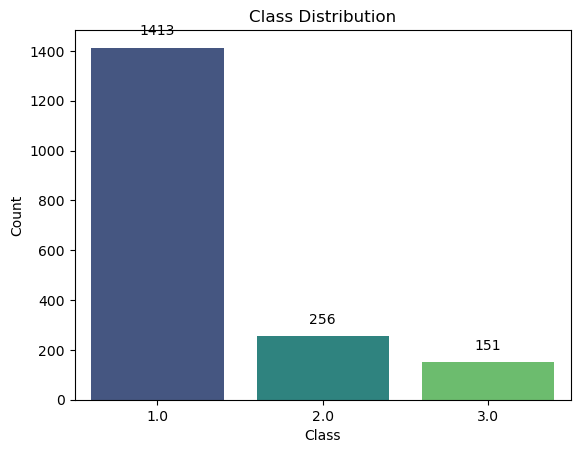

In [33]:
# Define class of NSP
N = dt[dt['NSP'] == 1]
S = dt[dt['NSP'] == 2]
P = dt[dt['NSP'] == 3]

print(len(N))
print(len(S))
print(len(P))  # There is a significant imbalance in classes

# Bar plot for classes
class_freq = dt['NSP'].value_counts().reset_index()
class_freq.columns = ['Class', 'Count']
sns.barplot(x='Class', y='Count', data=class_freq, palette="viridis")
for i in range(class_freq.shape[0]):
    plt.text(i, class_freq['Count'][i] + 50, class_freq['Count'][i], ha='center')
plt.ylabel("Count")
plt.xlabel("Class")
plt.title("Class Distribution")
plt.show()


In [62]:
DATA = pd.concat([N, S, P], ignore_index=True)
DATA.columns.values[13] = 'class'

# Correlation matrix & top 10 correlation values
corr = DATA.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
top_10 = corr.head(10)
bottom_10 = corr.tail(10)

print("Top 10 Correlation Values:")
print(top_10)
print("\nBottom 10 Correlation Values:")
print(bottom_10)


Top 10 Correlation Values:
LB     LB       1.000000
Width  MSTV     0.667540
DL     MSTV     0.507096
       Width    0.479527
MSTV   ALTV     0.474970
Width  ALTV     0.460357
ALTV   class    0.443622
ASTV   class    0.438343
       ALTV     0.424791
MSTV   ASTV     0.398982
dtype: float64

Bottom 10 Correlation Values:
FM    MLTV        0.013750
ASTV  DS          0.012676
DS    MLTV        0.010433
      Tendency    0.007830
UC    DS          0.007008
ALTV  DS          0.003334
DS    FM          0.003008
FM    Tendency    0.000625
LB    DS          0.000536
DP    DS          0.000342
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


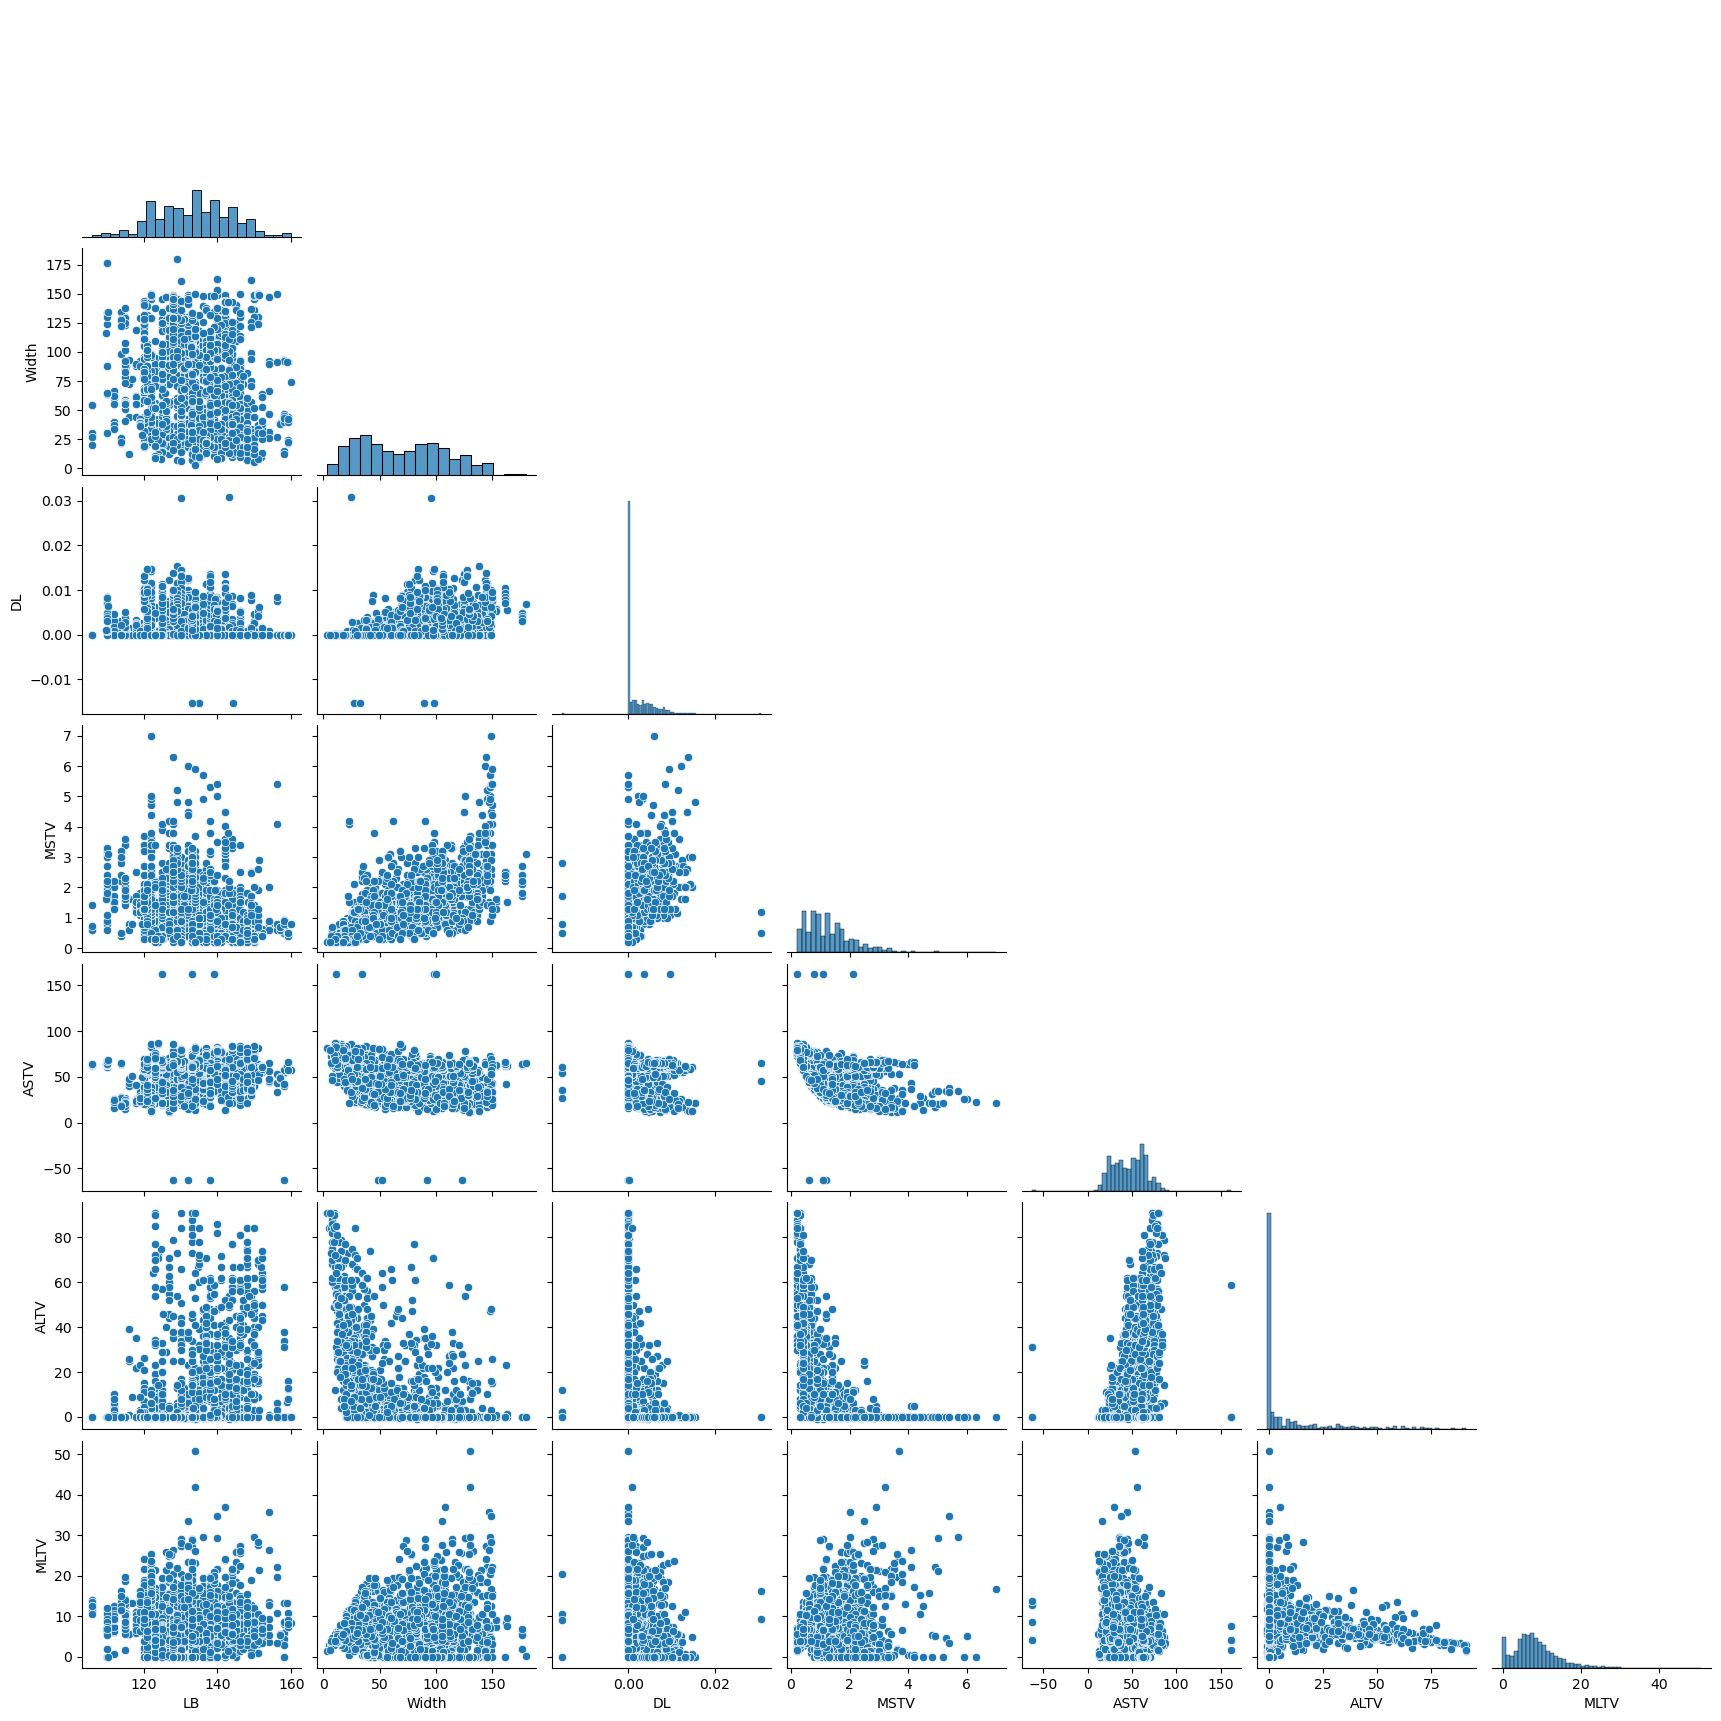

In [64]:
top_features = ['LB', 'Width', 'DL', 'MSTV', 'ASTV', 'ALTV', 'MLTV']

# Generate pairplot
sns.pairplot(DATA[top_features], corner=True)
plt.show()


In [51]:
# Discriminating power of Mean, LB, MSTV, Variance features
SN = (N.drop(columns=['NSP']) - N.drop(columns=['NSP']).mean()) / N.drop(columns=['NSP']).std()
SS = (S.drop(columns=['NSP']) - S.drop(columns=['NSP']).mean()) / S.drop(columns=['NSP']).std()
SP = (P.drop(columns=['NSP']) - P.drop(columns=['NSP']).mean()) / P.drop(columns=['NSP']).std()

SS = SS.fillna(0)  # Replace NA values in SS with 0



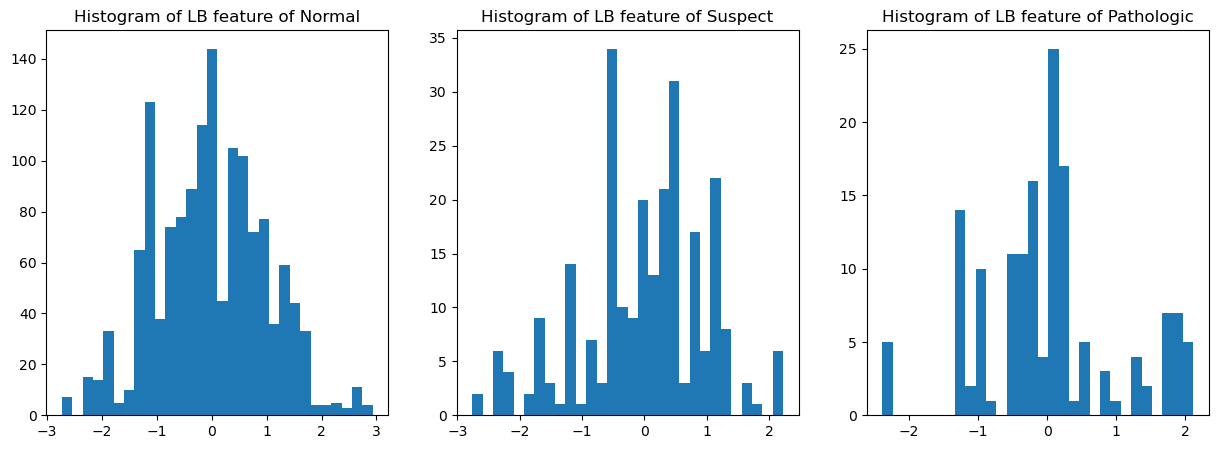

In [47]:
# Histograms: LB feature for each class
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(SN['LB'], bins=30)
plt.title("Histogram of LB feature of Normal")
plt.subplot(1, 3, 2)
plt.hist(SS['LB'], bins=30)
plt.title("Histogram of LB feature of Suspect")
plt.subplot(1, 3, 3)
plt.hist(SP['LB'], bins=30)
plt.title("Histogram of LB feature of Pathologic")
plt.show()

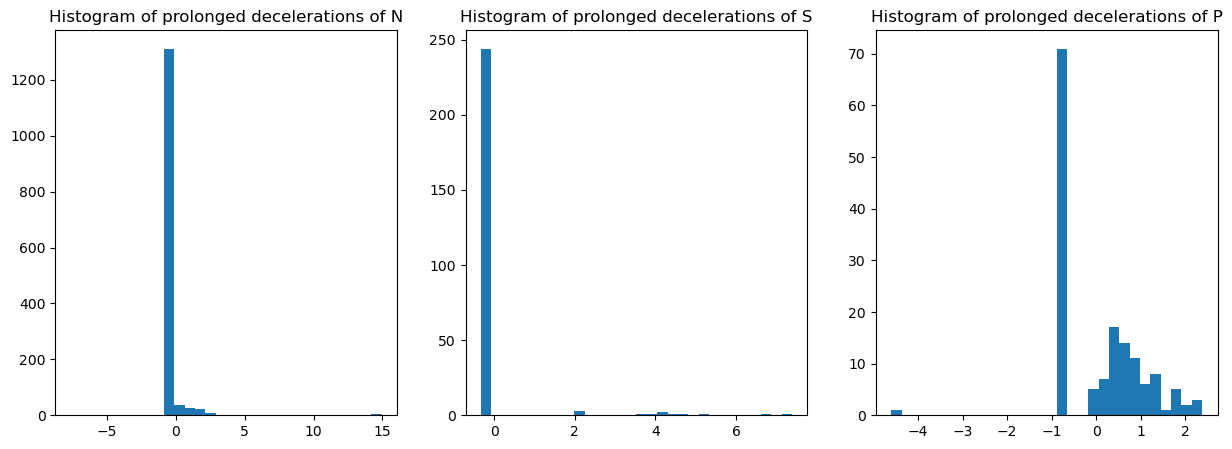

In [45]:

# Histograms: DP feature for each class
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(SN['DP'], bins=30)
plt.title("Histogram of prolonged decelerations of N")
plt.subplot(1, 3, 2)
plt.hist(SS['DP'], bins=30)
plt.title("Histogram of prolonged decelerations of S")
plt.subplot(1, 3, 3)
plt.hist(SP['DP'], bins=30)
plt.title("Histogram of prolonged decelerations of P")
plt.show()
